In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [4]:
movie_df = pd.read_csv("../input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")
movie_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## check duplication

In [6]:
movie_df.duplicated().sum()

0

## Convert Runtime & Gross column to numeric

In [7]:
movie_df.Runtime = movie_df.Runtime.str.replace("min", "")
movie_df['Runtime'] = pd.to_numeric(movie_df.Runtime)
movie_df.Gross=movie_df.Gross.str.replace(",","")
movie_df['Gross']=pd.to_numeric(movie_df.Gross)
movie_df.head(1)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0


## convert Released_year to date

In [13]:
movie_df[~movie_df.Released_Year.str.isnumeric()]


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [17]:
movie_df.loc[966,'Released_Year']=1995
movie_df['Released_Year'] = pd.to_datetime(movie_df['Released_Year'], format="%Y").dt.year

## transform data from categorical to numerical 

In [21]:

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
movie_df['Certificate'] = lbl.fit_transform(movie_df['Certificate'])
movie_df['Director'] = lbl.fit_transform(movie_df['Director'])
movie_df['Star1'] = lbl.fit_transform(movie_df['Star1'])

## check null values

In [8]:
movie_df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [10]:
movie_df['Certificate'].fillna("unknown",inplace=True)
movie_df['Gross'].fillna(movie_df['Gross'].mean() , inplace = True )
movie_df['Meta_score'].fillna(movie_df['Meta_score'].mean() , inplace = True )

## Q1 What kinds of properties are associated with movies that have high cross?

## using Heatmap to find the relationship between variables

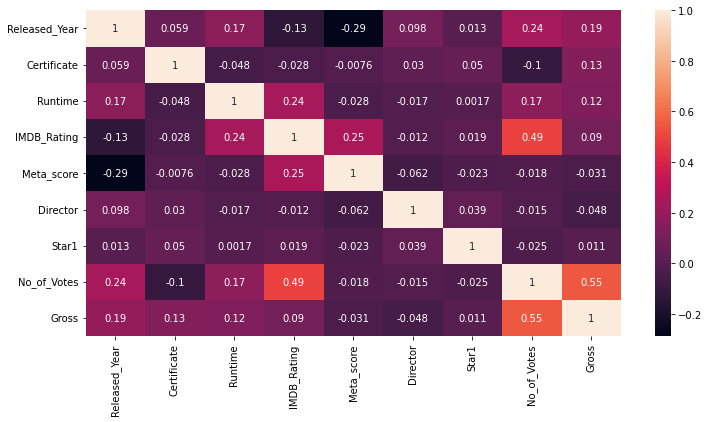

In [22]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(movie_df.corr(), annot=True, ax=ax);

### the conclusion :
##### the kinds of prop. are associated with movies that have high Gross :  No_votes

## Q2 Is there a relationship between IMDB_Rating & Released_Year ?

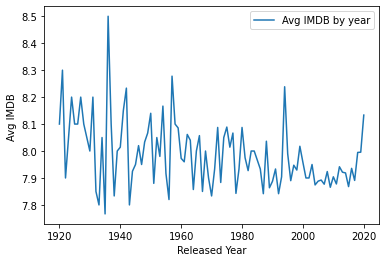

In [23]:
df1 = movie_df.groupby('Released_Year')['IMDB_Rating'].mean()
df1.plot( label='Avg IMDB by year')
plt.legend()
plt.xlabel('Released Year')
plt.ylabel('Avg IMDB ')
plt.show()

## Q3 what is the avg of Runtime ? 

Text(0.5, 0, 'Movie running time(minutes)')

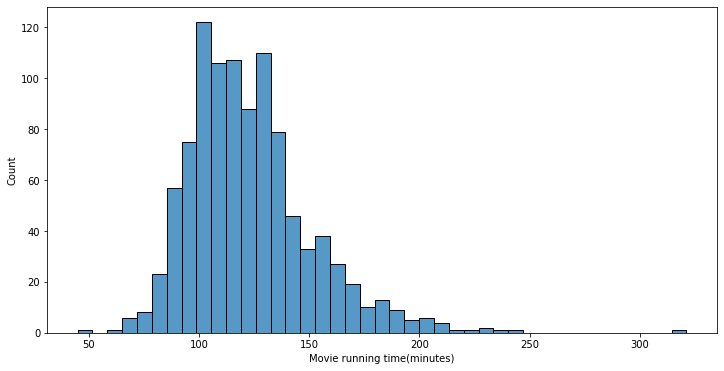

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=movie_df['Runtime'],ax=ax)
plt.xlabel('Movie running time(minutes)')

## Q4 what is the most Certificate popular among people ?

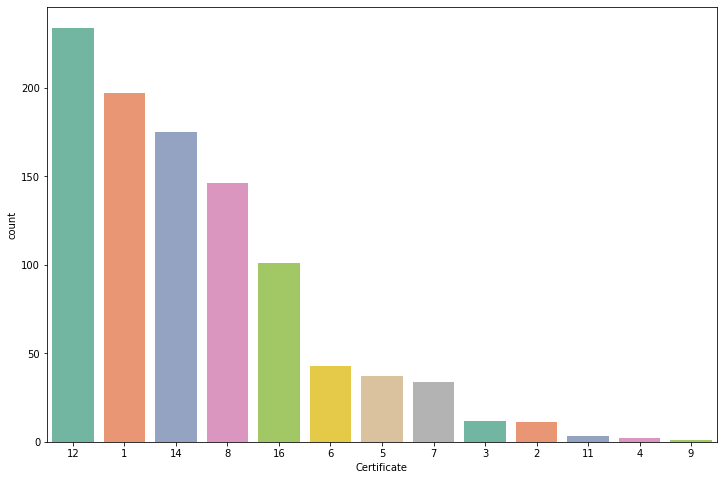

In [35]:
df2 = movie_df.groupby('Certificate')['IMDB_Rating'].mean() 
fig, ax1 = plt.subplots(figsize=(12,8))
ax1 = sns.countplot(x="Certificate", data=movie_df, palette="Set2", order=movie_df['Certificate'].value_counts().index[0:13])